<a href="https://colab.research.google.com/github/2303a51343/Aiml-2025/blob/main/lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
fetch_openml(data_id=5)

{'data':      age sex  height  weight  ...  chV6_PwaveAmp  chV6_TwaveAmp  chV6_QRSA  chV6_QRSTA
 0     75   0     190      80  ...            0.9            2.9       23.3        49.4
 1     56   1     165      64  ...            0.2            2.1       20.4        38.8
 2     54   0     172      95  ...            0.3            3.4       12.3        49.0
 3     55   0     175      94  ...            0.4            2.6       34.6        61.6
 4     75   0     190      80  ...           -0.1            3.9       25.4        62.8
 ..   ...  ..     ...     ...  ...            ...            ...        ...         ...
 447   53   1     160      70  ...            0.7            0.6       -4.4        -0.5
 448   37   0     190      85  ...            0.4            2.4       38.0        62.4
 449   36   0     166      68  ...            1.5            1.0      -44.2       -33.2
 450   32   1     155      55  ...            0.5            2.4       25.0        46.6
 451   78   1     160   

In [17]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto') # changed variable name from clear_data to car_data

In [18]:
type(car_data)

sklearn.utils._bunch.Bunch

In [20]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [21]:
car_data.feature_names,car_data.target

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 0       P
 1       P
 2       P
 3       P
 4       P
        ..
 1723    N
 1724    N
 1725    P
 1726    N
 1727    N
 Name: binaryClass, Length: 1728, dtype: category
 Categories (2, object): ['N', 'P'])

In [22]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [23]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


<Axes: xlabel='binaryClass', ylabel='count'>

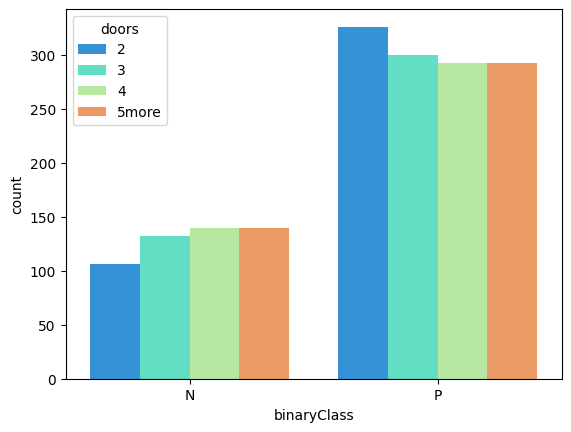

In [25]:
sns.countplot(x=car_data.binaryClass,hue='doors',data=car_data,palette='rainbow')

In [28]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.2,random_state=20)
print('Dataset size:{}\n training data is:{}\n testing data is:{}'.format(len(car_data),len(train_data),len(test_data)))
car_data.shape,train_data.shape,test_data.shape

Dataset size:1728
 training data is:1382
 testing data is:346


((1728, 7), (1382, 7), (346, 7))

In [29]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [31]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [30]:
train_data['buying'].value_counts()

,count
buying,
med,364
high,345
vhigh,343
low,330


In [32]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

In [35]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [37]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
car_train_prepared.shape,car_labels_prepared.shape

((1382, 6), (1382,))

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

In [46]:
from sklearn.tree import export_text
text_representation=export_text(tree_clf,feature_names=list(car_train.columns))
print(text_representation)


|--- persons <= 0.50
|   |--- class: 1
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- maint >  2.50
|   |   |   |   |--- buying <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- buying >  0.50
|   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- persons >  1.50
|  

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
preds=tree_clf.predict(car_train_prepared)
print(accuracy_score(car_labels_prepared,preds))
print(classification_report(car_labels_prepared,preds))
print(confusion_matrix(car_labels_prepared,preds))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

[[404   0]
 [  0 978]]
